<a href="https://colab.research.google.com/github/sakshisinha-13/Google-Play-Store-App-Market-Analysis/blob/main/Google_Play_Store_App_Market_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
# Read in dataset
import pandas as pd
apps_with_duplicates = pd.read_csv('/content/sample_data/apps.csv')

# Drop duplicates from apps_with_duplicates
apps = apps_with_duplicates.drop_duplicates()

# Print the total number of apps
print('Total number of apps in the dataset = ', apps.shape[0])

# Have a look at a random sample of 5 rows
print(apps.sample(5))

Total number of apps in the dataset =  9659
      Unnamed: 0                                       App           Category  \
2480        3191  Orbitz - Hotels, Flights & Package Deals   TRAVEL_AND_LOCAL   
4515        5479                          iScore5 AP Psych             FAMILY   
4227        5179                     Ai illustrator viewer     ART_AND_DESIGN   
3603        4508                              Q Avatar Pro             FAMILY   
4293        5247                                   AJ AUTO  AUTO_AND_VEHICLES   

      Rating  Reviews  Size    Installs  Type  Price Content Rating  \
2480     4.4    33256   NaN  1,000,000+  Free      0       Everyone   
4515     2.9       10  73.0        100+  Paid  $4.99       Everyone   
4227     3.4      486   5.9    100,000+  Free      0       Everyone   
3603     4.8        4   3.6        100+  Paid  $1.49           Teen   
4293     NaN        0   7.7         10+  Free      0       Everyone   

               Genres       Last Updated  

## 2. Data cleaning

In [16]:
# List of characters to remove
chars_to_remove = ['+', ',', '$']
# List of column names to clean
cols_to_clean = ['Installs', 'Price']

# Loop for each column in cols_to_clean
for col in cols_to_clean:
    # Loop for each char in chars_to_remove
    for char in chars_to_remove:
        # Replace the character with an empty string
        apps[col] = apps[col].apply(lambda x: x.replace(char, ''))

# Print a summary of the apps dataframe
print(apps.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9659 entries, 0 to 9658
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      9659 non-null   int64  
 1   App             9659 non-null   object 
 2   Category        9659 non-null   object 
 3   Rating          8196 non-null   float64
 4   Reviews         9659 non-null   int64  
 5   Size            8432 non-null   float64
 6   Installs        9659 non-null   object 
 7   Type            9659 non-null   object 
 8   Price           9659 non-null   object 
 9   Content Rating  9659 non-null   object 
 10  Genres          9659 non-null   object 
 11  Last Updated    9659 non-null   object 
 12  Current Ver     9651 non-null   object 
 13  Android Ver     9657 non-null   object 
dtypes: float64(2), int64(2), object(10)
memory usage: 1.0+ MB
None


## 3. Correcting data types

In [17]:
import numpy as np

# Convert Installs to float data type
apps['Installs'] = apps['Installs'].astype('float')

# Convert Price to float data type
apps['Price'] = apps['Price'].astype('float')

# Checking dtypes of the apps dataframe
print(apps.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9659 entries, 0 to 9658
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      9659 non-null   int64  
 1   App             9659 non-null   object 
 2   Category        9659 non-null   object 
 3   Rating          8196 non-null   float64
 4   Reviews         9659 non-null   int64  
 5   Size            8432 non-null   float64
 6   Installs        9659 non-null   float64
 7   Type            9659 non-null   object 
 8   Price           9659 non-null   float64
 9   Content Rating  9659 non-null   object 
 10  Genres          9659 non-null   object 
 11  Last Updated    9659 non-null   object 
 12  Current Ver     9651 non-null   object 
 13  Android Ver     9657 non-null   object 
dtypes: float64(4), int64(2), object(8)
memory usage: 1.0+ MB
None


## 4. Exploring app categories

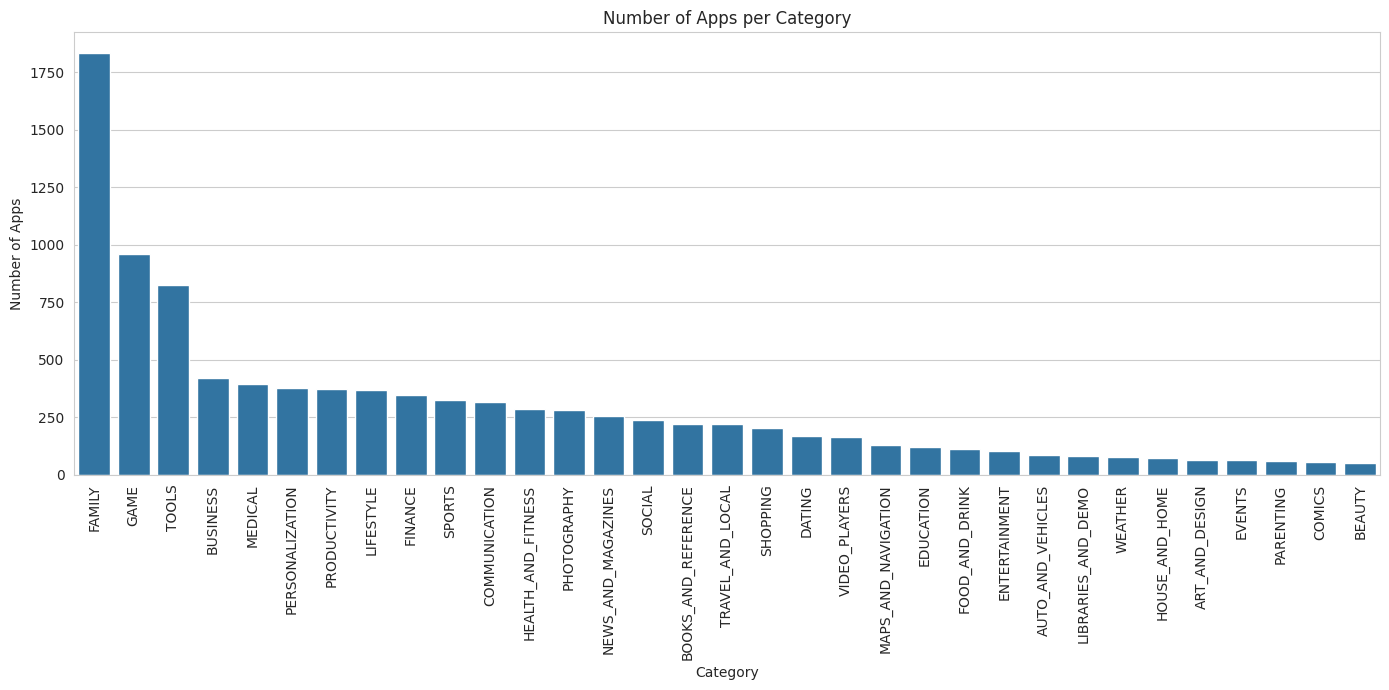

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
# Count the number of apps per category
num_apps_in_category = apps['Category'].value_counts()

# Set figure size and style
plt.figure(figsize=(14, 7))
sns.set_style("whitegrid")

# Create bar plot
sns.barplot(x=num_apps_in_category.index, y=num_apps_in_category.values)

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)
plt.title('Number of Apps per Category')
plt.xlabel('Category')
plt.ylabel('Number of Apps')
plt.tight_layout()

# Show plot
plt.show()

## 5. Distribution of app ratings

Average app rating = 4.173243045387994


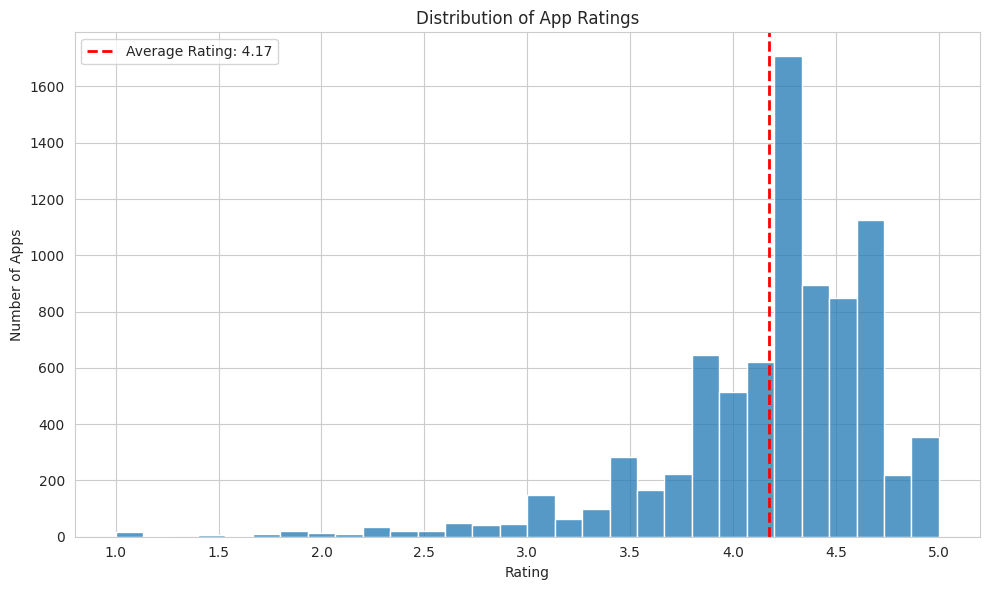

In [19]:
# Calculate average app rating
avg_app_rating = apps['Rating'].mean()
print('Average app rating =', avg_app_rating)

# Set the figure size and style
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

# Plot histogram
sns.histplot(apps['Rating'].dropna(), bins=30, kde=False)

# Draw vertical line for average rating
plt.axvline(avg_app_rating, color='red', linestyle='--', linewidth=2, label=f'Average Rating: {avg_app_rating:.2f}')

# Titles and labels
plt.title('Distribution of App Ratings')
plt.xlabel('Rating')
plt.ylabel('Number of Apps')
plt.legend()
plt.tight_layout()
plt.show()

## 6. Size and price of an app

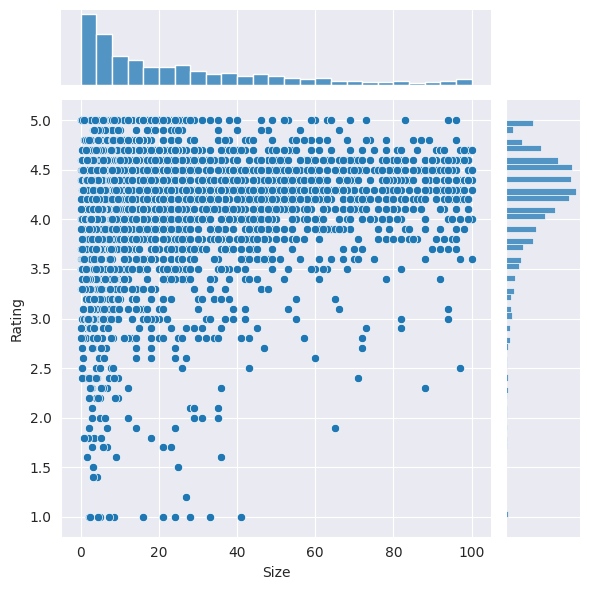

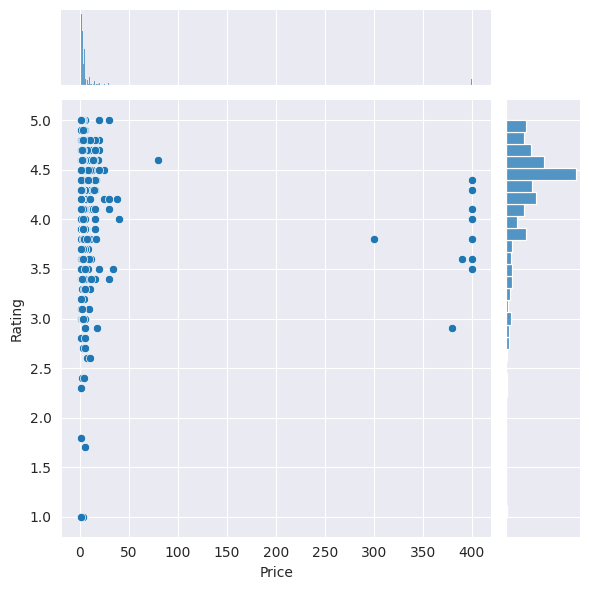

In [20]:
%matplotlib inline
sns.set_style("darkgrid")
import warnings
warnings.filterwarnings("ignore")

# Select rows where both 'Rating' and 'Size' values are present (ie. the two values are not null)
apps_with_size_and_rating_present = apps[apps.Rating.notnull() & apps.Size.notnull()]

# Subset for categories with at least 250 apps
large_categories = apps_with_size_and_rating_present.groupby('Category').filter(lambda x: len(x) >= 250)

# Plot size vs. rating
plt1 = sns.jointplot(x = large_categories['Size'], y = large_categories['Rating'])

# Select apps whose 'Type' is 'Paid'
paid_apps = apps_with_size_and_rating_present[apps_with_size_and_rating_present['Type'] == 'Paid']

# Plot price vs. rating
plt2 = sns.jointplot(x = paid_apps['Price'], y = paid_apps['Rating'])

## 7. Relation between app category and app price

,Category,App,Price
3327,FAMILY,most expensive app (H),399.99
3465,LIFESTYLE,💎 I'm rich,399.99
3469,LIFESTYLE,I'm Rich - Trump Edition,400.00
4396,LIFESTYLE,I am rich,399.99
4398,FAMILY,I am Rich Plus,399.99
4399,LIFESTYLE,I am rich VIP,299.99
4400,FINANCE,I Am Rich Premium,399.99
4401,LIFESTYLE,I am extremely Rich,379.99
4402,FINANCE,I am Rich!,399.99
4403,FINANCE,I am rich(premium),399.99


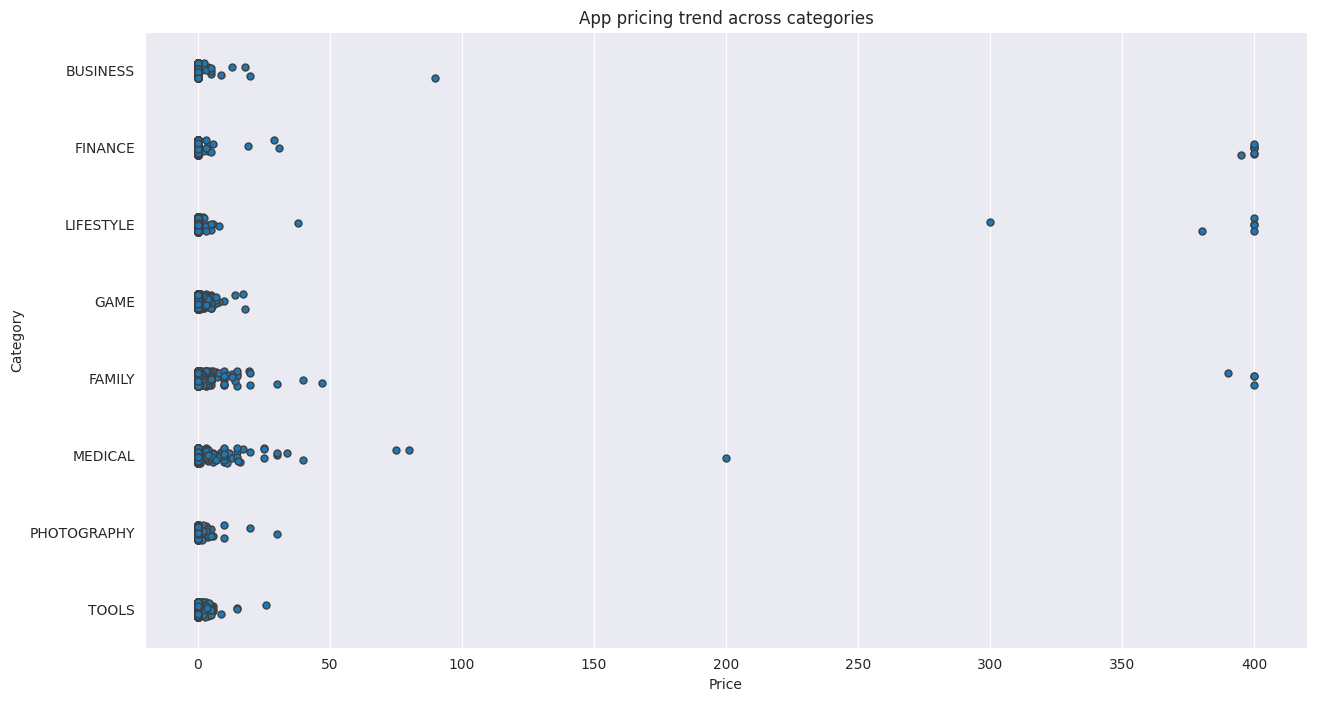

In [21]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

# Select a few popular app categories
popular_app_cats = apps[apps.Category.isin(['GAME', 'FAMILY', 'PHOTOGRAPHY',
                                            'MEDICAL', 'TOOLS', 'FINANCE',
                                            'LIFESTYLE','BUSINESS'])]

# Examine the price trend by plotting Price vs Category
ax = sns.stripplot(x = popular_app_cats['Price'], y = popular_app_cats['Category'], jitter=True, linewidth=1)
ax.set_title('App pricing trend across categories')

# Apps whose Price is greater than 200
apps_above_200 = apps[apps['Price'] > 200]
apps_above_200[['Category', 'App', 'Price']]

## 8. Filter out "junk" apps

Text(0.5, 1.0, 'App pricing trend across categories after filtering for junk apps')

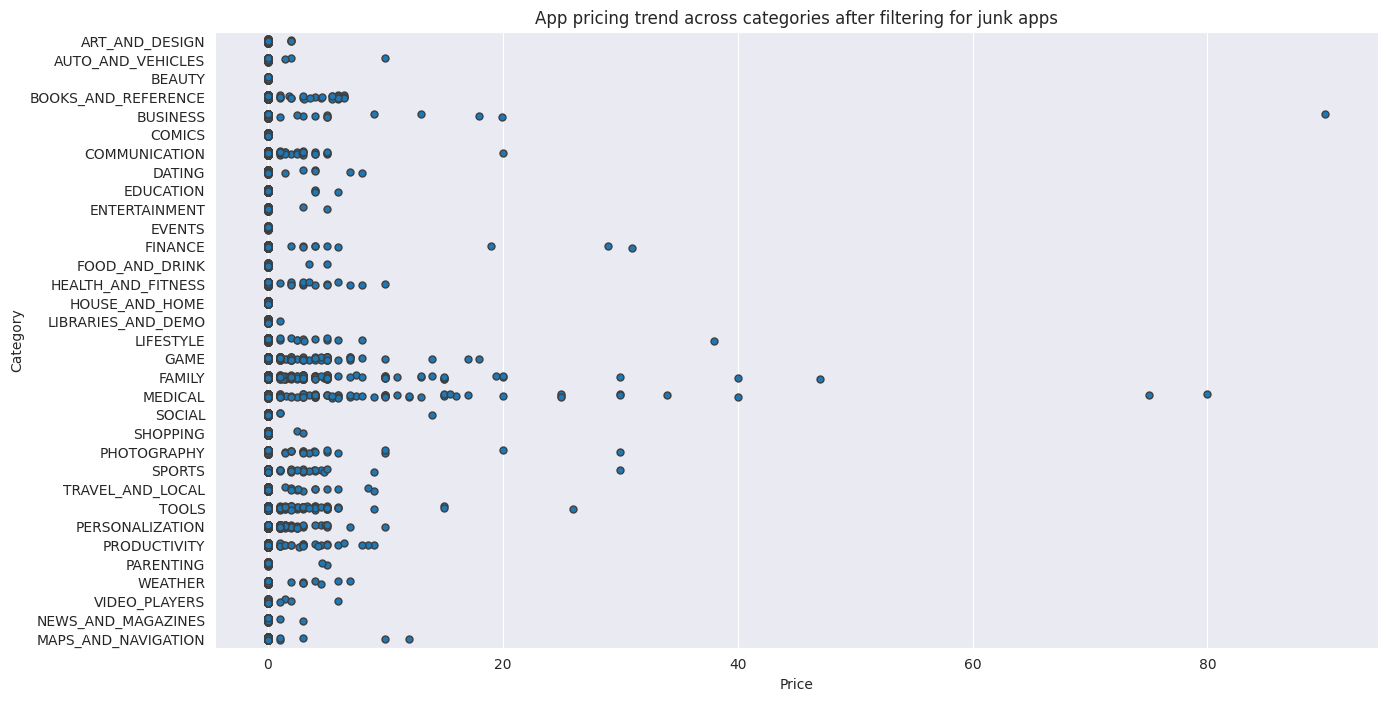

In [22]:
# Select apps priced below $100
apps_under_100 = apps[apps.Price < 100]

fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

# Examine price vs category with the authentic apps (apps_under_100)
ax = sns.stripplot(x = 'Price', y = 'Category', data = apps_under_100, jitter = True, linewidth = 1)
ax.set_title('App pricing trend across categories after filtering for junk apps')

## 9. Popularity of paid apps vs free apps

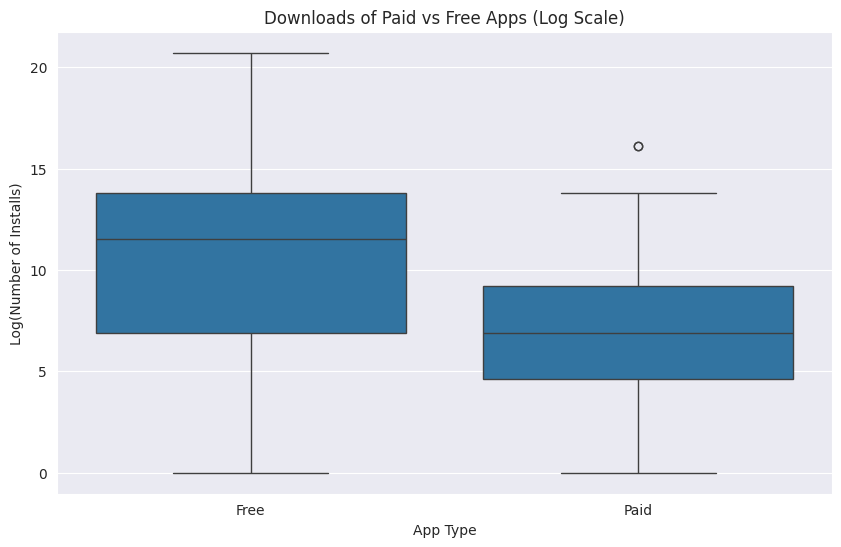

In [26]:
# Apply log scale to downloads for better visualization
apps_log = apps.copy()
apps_log['Log_Installs'] = np.log1p(apps_log['Installs'])

plt.figure(figsize=(10, 6))
sns.boxplot(x='Type', y='Log_Installs', data=apps_log)
plt.title('Downloads of Paid vs Free Apps (Log Scale)')
plt.xlabel('App Type')
plt.ylabel('Log(Number of Installs)')
plt.show()

## 10. Sentiment analysis of user reviews

Text(0.5, 1.0, 'Sentiment Polarity Distribution')

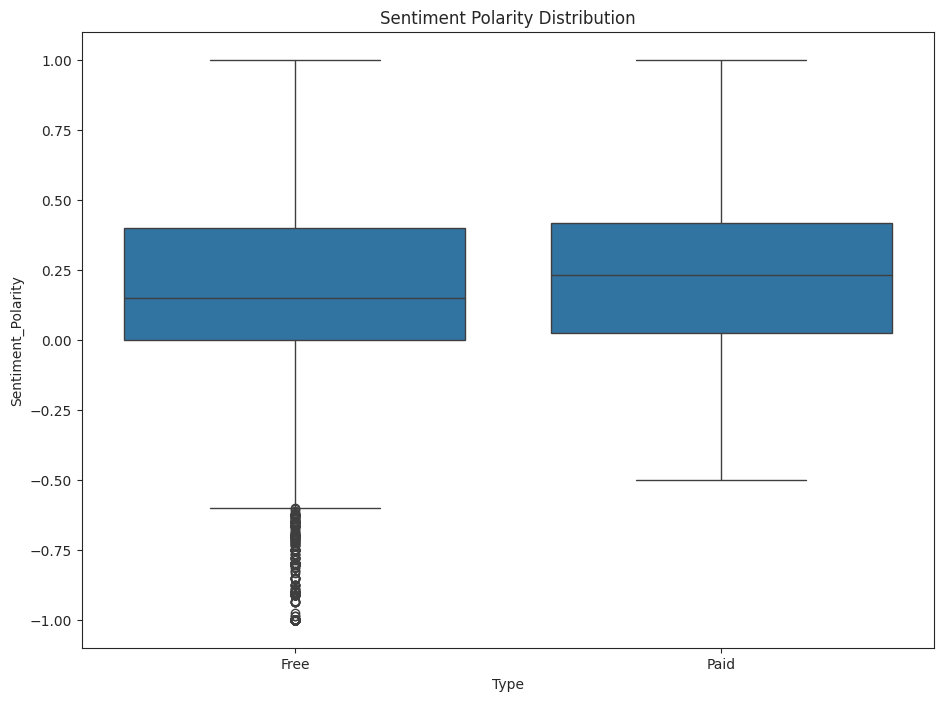

In [27]:
# Load user_reviews.csv
reviews_df = pd.read_csv("/content/sample_data/user_reviews.csv")

# Join the two dataframes
merged_df = pd.merge(apps, reviews_df, on = "App", how = "inner")

# Drop NA values from Sentiment and Review columns
merged_df = merged_df.dropna(subset = ['Sentiment', 'Review'])

sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11, 8)

# User review sentiment polarity for paid vs. free apps
ax = sns.boxplot(x = 'Type', y = 'Sentiment_Polarity', data = merged_df)
ax.set_title('Sentiment Polarity Distribution')